In [1]:
import pandas as pd
from copy import copy

def normalize_df(data, time_col):
    data = copy(data)
    data[time_col] = pd.to_datetime(data[time_col]).dt.tz_localize(None)
    data[time_col] = data[time_col] + pd.Timedelta(hours=8)
    data.set_index(time_col, inplace=True)
    data = data.resample('20min').mean()
    data.reset_index(inplace=True)

    start_time = pd.to_datetime("2024-08-08 16:00:00")
    end_time = pd.to_datetime("2024-08-13 12:00:00")
    data = data[(data[time_col] >= start_time) & (data[time_col] <= end_time)]

    return data

In [3]:
diy_df = pd.read_csv("./sfa30.txt", header=None, names=["hcho", "hum", "temp", "time"])
xiaomi_df = pd.read_csv("./xiaomi5s.csv")[["state", "last_changed"]]

diy_df = normalize_df(diy_df, "time")
xiaomi_df = normalize_df(xiaomi_df, "last_changed")

In [4]:
diy_df

,time,hcho,hum,temp
7,2024-08-08 16:00:00,15.492437,68.912521,25.984622
8,2024-08-08 16:20:00,15.386555,72.241345,26.774454
9,2024-08-08 16:40:00,13.132773,73.295966,27.254790
10,2024-08-08 17:00:00,13.236975,73.761933,27.386975
11,2024-08-08 17:20:00,12.144538,74.592017,27.390924
...,...,...,...,...
351,2024-08-13 10:40:00,15.541176,67.634538,26.129664
352,2024-08-13 11:00:00,16.048739,68.293950,26.006723
353,2024-08-13 11:20:00,13.988235,67.742017,26.295798
354,2024-08-13 11:40:00,15.655462,68.489580,26.067983


In [5]:
xiaomi_df

,last_changed,state
0,2024-08-08 16:00:00,0.033800
1,2024-08-08 16:20:00,0.032250
2,2024-08-08 16:40:00,0.029500
3,2024-08-08 17:00:00,0.031500
4,2024-08-08 17:20:00,0.032300
...,...,...
344,2024-08-13 10:40:00,0.038750
345,2024-08-13 11:00:00,0.043833
346,2024-08-13 11:20:00,0.037667
347,2024-08-13 11:40:00,0.037500


In [6]:
assert len(diy_df) == len(xiaomi_df)

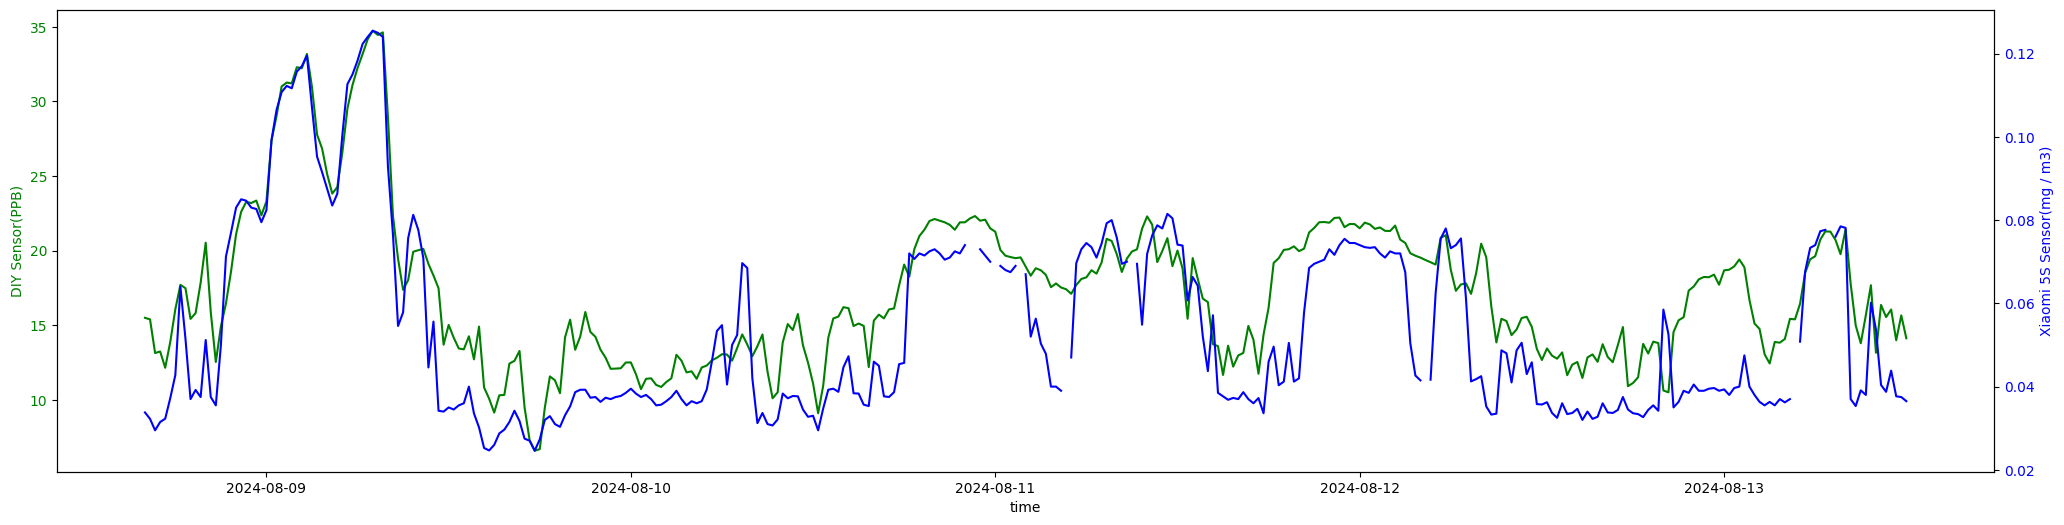

In [7]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, diy_ax = plt.subplots(figsize=(25, 6))
xiaomi_ax = diy_ax.twinx()

x = xiaomi_df.last_changed
diy_ax.set_xlabel('time')

diy_ax.plot(x, diy_df.hcho, 'g-', label='y1: Unit 1')
diy_ax.set_ylabel('DIY Sensor(PPB)', color='g')
diy_ax.tick_params(axis='y', labelcolor='g')

xiaomi_ax.plot(x, xiaomi_df.state, 'b-', label='y2: Unit 2')
xiaomi_ax.set_ylabel('Xiaomi 5S Sensor(mg / m3)', color='b')
xiaomi_ax.tick_params(axis='y', labelcolor='b')